In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dict1={'Names':['Ramesh','Suresh',np.nan,'Mahesh','Sathish'],
       'Age':[31,32,33,np.nan,40],
      'City':[np.nan,'Hyderabad','Pune','Mumbai','Chennai']}

In [7]:
data1=pd.DataFrame(dict1)
data1

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyderabad
2,NaN,33.0,Pune
3,Mahesh,NaN,Mumbai
4,Sathish,40.0,Chennai


In [8]:
data1.isnull()

,Names,Age,City
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False
4,False,False,False


In [9]:
data1.isnull().sum() # Every column as 1 missing value

Names    1
Age      1
City     1
dtype: int64

In [11]:
data1.isnull().sum()*100/len(data1)    # Percentage of missing values

Names    20.0
Age      20.0
City     20.0
dtype: float64

In [13]:
dict2={'Names':['Ramesh','Suresh',None,'Mahesh'],
       'Age':[31,32,33,None],
      'City':[None,'Hyderabad','Mumbai','Chennai']}
data2=pd.DataFrame(dict2)
data2                        

,Names,Age,City
0,Ramesh,31.0,None
1,Suresh,32.0,Hyderabad
2,None,33.0,Mumbai
3,Mahesh,NaN,Chennai


In [15]:
data2.isnull().sum()

Names    1
Age      1
City     1
dtype: int64

In [16]:
# Categorical : None , NaN
# Numerical : NaN

In [17]:
dict3={'Names':['Ramesh','Suresh','Null','Mahesh'],
       'Age':[31,32,33,'Null'],
      'City':['Null','Hyderabad','Mumbai','Chennai']}
data3=pd.DataFrame(dict3)
data3       

,Names,Age,City
0,Ramesh,31,Null
1,Suresh,32,Hyderabad
2,Null,33,Mumbai
3,Mahesh,Null,Chennai


In [19]:
data3.isnull().sum()

Names    0
Age      0
City     0
dtype: int64

$Method-1$
>Fill the missing values with random number
##### Method name: fillna

In [22]:
data1.fillna('Hello')   # All the missing data is replaced with random value

,Names,Age,City
0,Ramesh,31.0,Hello
1,Suresh,32.0,Hyderabad
2,Hello,33.0,Pune
3,Mahesh,Hello,Mumbai
4,Sathish,40.0,Chennai


$Method-2$
>Fill the missing values with random number to a specific column

In [23]:
data1['Names'].fillna('Sandeep',inplace=True) # By 
data1

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyderabad
2,Sandeep,33.0,Pune
3,Mahesh,NaN,Mumbai
4,Sathish,40.0,Chennai


In [24]:
dict1={'Names':['Ramesh','Suresh',np.nan,'Mahesh','Sathish'],
       'Age':[31,32,33,np.nan,40],
      'City':[np.nan,'Hyderabad','Pune','Mumbai','Chennai']}
data1=pd.DataFrame(dict1)
data1

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyderabad
2,NaN,33.0,Pune
3,Mahesh,NaN,Mumbai
4,Sathish,40.0,Chennai


$Method-3$
>- bfill
>- ffill
>- pad
>- backfill

In [26]:
data1.fillna(method='backfill')
# Fills with the next index values

,Names,Age,City
0,Ramesh,31.0,Hyderabad
1,Suresh,32.0,Hyderabad
2,Mahesh,33.0,Pune
3,Mahesh,40.0,Mumbai
4,Sathish,40.0,Chennai


In [27]:
data1.fillna(method='bfill')  # bfill and backfill are same

,Names,Age,City
0,Ramesh,31.0,Hyderabad
1,Suresh,32.0,Hyderabad
2,Mahesh,33.0,Pune
3,Mahesh,40.0,Mumbai
4,Sathish,40.0,Chennai


In [28]:
data1.fillna(method='ffill')  
# Fills with the before index value

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyderabad
2,Suresh,33.0,Pune
3,Mahesh,33.0,Mumbai
4,Sathish,40.0,Chennai


In [29]:
data1.fillna(method='pad') # ffill and pad are same

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyderabad
2,Suresh,33.0,Pune
3,Mahesh,33.0,Mumbai
4,Sathish,40.0,Chennai


$Method-4$
>- Mean
>- Median
>- Mode

In [30]:
age_mean = data1['Age'].mean()
age_mean

34.0

In [36]:
data1['Age'].fillna(age_mean,inplace=True)
data1

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyderabad
2,NaN,33.0,Pune
3,Mahesh,34.0,Mumbai
4,Sathish,40.0,Chennai


In [37]:
dict1={'Names':['Ramesh','Suresh',np.nan,'Mahesh','Sathish'],
       'Age':[31,32,33,np.nan,40],
      'City':[np.nan,'Hyderabad','Pune','Mumbai','Chennai']}
data1=pd.DataFrame(dict1)
data1

,Names,Age,City
0,Ramesh,31.0,NaN
1,Suresh,32.0,Hyderabad
2,NaN,33.0,Pune
3,Mahesh,NaN,Mumbai
4,Sathish,40.0,Chennai


In [39]:
age_median = data1['Age'].median()
age_median

32.5

In [40]:
data1['Age'].fillna(age_median)

0    31.0
1    32.0
2    33.0
3    32.5
4    40.0
Name: Age, dtype: float64

In [42]:
age_mode = data1['Age'].mode()
age_mode

0    31.0
1    32.0
2    33.0
3    40.0
Name: Age, dtype: float64

$Method-5$
>##### KNN imputer

- KNN: K Nearest Neighbours
- In the KNN imputer instead of taking mean of all the values
- Will choose neighbour data
- Will take those mean only

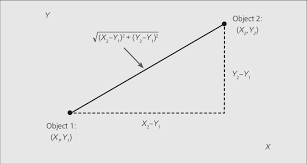

In [45]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=2) # n_neighbours is called hyper parameter
knn.fit_transform(data1[['Age']])

array([[31.],
       [32.],
       [33.],
       [34.],
       [40.]])

$Method-6$
>- Based on other columns
>- Some times all above methods will not provide good justification
>- At that time we need to check other column dependancy also
>- Most of the time will pick a column which have highest correlation